# CNN 

In [ ]:
#import libraries
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import time
from datetime import timedelta
import math

In [2]:
#load data
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

In [3]:
#helper function to plot images
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(28,28), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

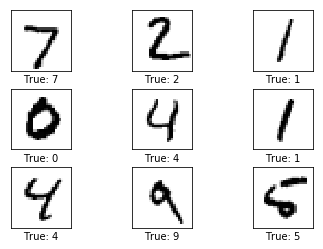

In [4]:
images = x_test[0:9]

# Get the true classes for those images.
cls_true = y_test[0:9]

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true)

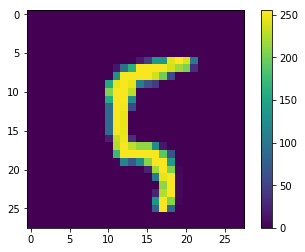

In [5]:
#plt.figure()
plt.imshow(x_train[100])
plt.colorbar()
plt.show()

In [6]:
#split data into train,test,val
x_val=x_train[50000:60000]
x_train=x_train[:50000]
y_val=y_train[50000:60000]
y_train=y_train[:50000]

In [7]:
#reshape the data
x_train=np.reshape(x_train,(50000))#28x28x1
x_val=np.reshape(x_val,(10000))
x_test=np.reshape(x_test,(10000))

In [8]:
#one hot encoding
num_classes=10
y_train=tf.keras.utils.to_categorical(y_train,num_classes)
y_val=tf.keras.utils.to_categorical(y_val,num_classes)
y_test=tf.keras.utils.to_categorical(y_test,num_classes)

In [9]:
#Normalize the data
x_train=x_train.astype("float")
x_val=x_val.astype("float")
x_test=x_test.astype("float")

In [10]:
x_train/=255
x_val/=255
x_test/=255


In [11]:
#create placeholder
X=tf.placeholder(tf.float32,[None])#28x28x1
Y=tf.placeholder(tf.float32,[None,10])

In [12]:
def weight_variable(shape):
    initial=(tf.truncated_normal(shape,stddev=0.1))
    return tf.Variable(initial)

In [13]:
def bias_variable(shape):
    initial=tf.constant(0.1,shape=shape)
    return tf.Variable(initial)

In [14]:
def conv2d(X,w):
    return                          # tf.nn.conv2d(X,w,strides=[1,1,1,1],padding='SAME')

In [15]:
def maxpool_2x(X):
    return                             # tf.nn.max_pool(X,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')

In [16]:
#model building 
w_conv1=weight_variable([])#dim of filter,input channel,number of filters
b_conv1=bias_variable([])
h_conv1=conv2d(X,w_conv1)

In [17]:
b1_add=tf.add(h_conv1,b_conv1)
h_conv1_a=tf.nn.relu(b1_add)
max_pool1=maxpool_2x(h_conv1_a)

In [18]:
w_conv2=weight_variable([])#dim of filter,input channel,number of filters
b_conv2=bias_variable([])
h2_conv2=tf.nn.relu(conv2d(max_pool1,w_conv2)+b_conv2)
max_pool2=maxpool_2x(h2_conv2)

In [19]:
w_fc1=weight_variable([7*7*32,128])#input max_pool2 layer input ;number of neurons
bias_fc1=bias_variable([128])
max_pool2_flatten=tf.reshape(max_pool2,[-1,7*7*32])

In [20]:
h_fc1=tf.nn.relu((tf.matmul(max_pool2_flatten,w_fc1)+bias_fc1))

In [21]:
w_fc2=weight_variable([128,10])
bias_fc2=bias_variable([10])

In [22]:
h_fc2=tf.matmul(h_fc1,w_fc2)+bias_fc2

In [23]:
loss_op=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=h_fc2,labels=Y))
train_op=tf.train.AdamOptimizer(learning_rate=0.01).minimize(loss_op)

In [24]:
init=tf.global_variables_initializer()

In [28]:
epoch_cnt=1
batch_size=1000
iteration=len(x_train)//batch_size

In [31]:
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(epoch_cnt):
        start=0
        end=batch_size
        avg_loss=0
        for i in range(iteration):
            pred=tf.nn.softmax(h_fc2)
            correct_pred=tf.equal(tf.argmax(pred,1),tf.argmax(Y,1))
            accuracy=tf.reduce_mean(tf.cast(correct_pred,"float"))
            if i%10==0:
                print("iteration:  ",i," training acc: ",accuracy.eval({X:x_train[start:end],Y:y_train[start:end]}))
            
            sess.run(train_op,feed_dict={X:x_train[start:end],Y:y_train[start:end]})
            start+=batch_size
            end+=batch_size
        pred=tf.nn.softmax(h_fc2)
        correct_pred=tf.equal(tf.argmax(pred,1),tf.argmax(Y,1))
        accuracy=tf.reduce_mean(tf.cast(correct_pred,"float"))
        print("validation_acc: ",accuracy.eval({X:x_val,Y:y_val}))
    pred=tf.nn.softmax(h_fc2)
    correct_pred=tf.equal(tf.argmax(pred,1),tf.argmax(Y,1))
    accuracy=tf.reduce_mean(tf.cast(correct_pred,"float"))
    print("Test accuracy: ",accuracy.eval({X:x_test,Y:y_test}))

iteration:   0  training acc:  0.084
iteration:   10  training acc:  0.585
iteration:   20  training acc:  0.779
iteration:   30  training acc:  0.843
iteration:   40  training acc:  0.913
validation_acc:  0.9343
Test accuracy:  0.9355
